In [1]:
import pandas as pd
import tweepy as tp
import os
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering Data

- import this file: twitter-archive-enhanced.csv into archive_df DataFrame
- download image_predictions.tsv from the link : https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv programmatically and import it into image_pre DataFrame

In [2]:
archive_df = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response.status_code

200

In [4]:
with open('image_predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [5]:
image_pre = pd.read_csv('image_predictions.tsv',sep='\t')

- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library.

- store each tweet's entire set of JSON data in a file called tweet_json.txt file.Each tweet's JSON data should be written to its own line.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

- Then read this .txt file line by line into a pandas DataFrame (api_df) with (at minimum) tweet ID, retweet count, and favorite count.

In [6]:
tweet_id =[]
retweet_count=[]
fav_count=[]


In [7]:
with open('tweet_json.txt') as f:
    for line in f:
        json_tweets = json.loads(line.strip())
        tweet_id.append(json_tweets['id'])
        retweet_count.append(json_tweets['retweet_count'])
        fav_count.append(json_tweets['favorite_count'])

api_df = pd.Series(tweet_id).to_frame()
api_df.rename(columns={0:'tweet_id'},inplace=True)
api_df['retweet_count'] = pd.Series(retweet_count)
api_df['favorite_count'] = pd.Series(fav_count)


In [8]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
image_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Assessing Data

### Assessing visually


In [11]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
image_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programatically Assessing


In [14]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
archive_df.duplicated().sum()

0

In [21]:
image_pre.duplicated().sum()

0

In [22]:
api_df.duplicated().sum()

0

In [23]:
all_columns = pd.Series(list(api_df)+list(archive_df)+list(image_pre))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [24]:
archive_df.rating_denominator.min()

0

In [25]:
archive_df.rating_denominator.max()

170

In [26]:
image_pre.jpg_url.duplicated().sum()

66

In [27]:
archive_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [28]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
image_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness issues:
    - For archive_df Data Frame:
        - For column headers (doggo,floofer,pupper,puppo) are values not variables
    - tables should be mereged into one

### Quality issues:
    - For archive_df and image_pre Data Frames:
        - Not clear column names p1,p1_conf,p1_dog
        - rating denominator have strange values like 170 and 0 where it should be only 10
        - timestamp should be in datetime type instead of string
        - Bad representation of NaN values in doggo,floofer,pupper,puppo column
        - tweets with no images in image_pre should be removed
        -expanded_urls,in_reply_to_user_id,retweeted_status_user_id,retweeted_status_timestamp,p3,p2,p3_conf,p2_conf,p2_dog,p3_dog not in use
        - dogs breed names contain underscore
    - retweets and replies should be removed from the archive table and any related tables
        

# Cleaning Data

### Quality issues cleaning tasks definitions:


    - For archive_df and image_pre Data Frames:
        - For None values replace each None with np.NaN in all associated columns
        - replace every strange value in rating_denominator with 10
        - convert timestamp type to datetime using pandas.to_datetime()
        - drop columns expanded_urls,in_reply_to_user_id,retweeted_status_user_id,retweeted_status_timestamp,p3,p2,p3_conf,p2_conf,p2_dog,p3_dog
        - remove tweets not in image_pre dataframe
        - replace '_' with ' ' in predection column
        - Rename the columns [ p1, p1_conf, p1_dog] with [breed,accuracy, is_dog]
        
    - drop retweets and replies from the archive table and any related tables

In [30]:
archive_df_copy = archive_df.copy()
image_pre_copy = image_pre.copy()
api_df_copy = api_df.copy()

#### replace every strange value in rating_denominator with 10

In [31]:
to_replace_values = list(dict(archive_df_copy.rating_denominator.value_counts()).keys())
to_replace_values.remove(10)

In [32]:
archive_df_copy.rating_denominator.replace(to_replace=to_replace_values,value=10,inplace=True)

In [33]:
archive_df_copy.rating_denominator.unique()

array([10])

#### drop columns expanded_urls,in_reply_to_user_id,retweeted_status_user_id,retweeted_status_timestamp in archive_df

In [34]:
archive_df_copy=archive_df_copy.drop(columns=['expanded_urls','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### drop columns p3,p2,p3_conf,p2_conf,p2_dog,p3_dog in image_pre

In [35]:
image_pre_copy = image_pre_copy.drop(columns=[ 'p3','p2','p3_conf','p2_conf','p2_dog','p3_dog'],axis=1)

In [36]:
image_pre_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


In [37]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
retweeted_status_id      181 non-null float64
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 239.4+ KB


#### convert timestamp type to datetime using pandas.to_datetime()

In [38]:
archive_df_copy.timestamp = pd.to_datetime(archive_df_copy.timestamp)

In [39]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
retweeted_status_id      181 non-null float64
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 239.4+ KB


In [40]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### For None values replace each None with np.NaN in all associated columns

In [41]:
archive_df_copy.puppo.replace(to_replace='None',value=np.NAN,inplace=True)

In [42]:
archive_df_copy.pupper.replace(to_replace='None',value=np.NAN,inplace=True)

In [43]:
archive_df_copy.floofer.replace(to_replace='None',value=np.NAN,inplace=True)

In [44]:
archive_df_copy.doggo.replace(to_replace='None',value=np.NAN,inplace=True)

In [45]:
print('unique values for:\npuppo: {}\npupper: {}\nfloofer: {}\ndoggo: {}'.format(archive_df_copy.puppo.unique(),archive_df_copy.pupper.unique(),archive_df_copy.floofer.unique(),archive_df_copy.doggo.unique()))

unique values for:
puppo: [nan 'puppo']
pupper: [nan 'pupper']
floofer: [nan 'floofer']
doggo: [nan 'doggo']


#### remove tweets not in image_pre dataframe

In [46]:
archive_df_copy = archive_df_copy.merge(image_pre,left_on='tweet_id',right_on='tweet_id',how='inner')[list(archive_df_copy.columns)]

In [47]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id                 2075 non-null int64
in_reply_to_status_id    23 non-null float64
timestamp                2075 non-null datetime64[ns]
source                   2075 non-null object
text                     2075 non-null object
retweeted_status_id      81 non-null float64
rating_numerator         2075 non-null int64
rating_denominator       2075 non-null int64
name                     2075 non-null object
doggo                    80 non-null object
floofer                  8 non-null object
pupper                   222 non-null object
puppo                    24 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 227.0+ KB


In [48]:
set(archive_df_copy.tweet_id)==(set(image_pre.tweet_id))

True

#### Rename the columns [ p1, p1_conf, p1_dog] with [breed,accuracy, is_dog]

In [49]:
image_pre_copy.rename(columns={'p1':'breed','p1_conf':'accuracy','p1_dog':'is_dog'},inplace=True)

#### replace '_' with ' ' in breed column

In [50]:
image_pre_copy.breed=image_pre_copy.breed.str.replace('_',' ')

In [51]:
image_pre_copy.breed.unique()[:10]

array(['Welsh springer spaniel', 'redbone', 'German shepherd',
       'Rhodesian ridgeback', 'miniature pinscher', 'Bernese mountain dog',
       'box turtle', 'chow', 'shopping cart', 'miniature poodle'], dtype=object)

#### drop retweets and replies from the archive table and any related tables

In [52]:
retweet_id = archive_df_copy.retweeted_status_id.dropna()
replies_id = archive_df_copy.in_reply_to_status_id.dropna()

In [53]:
retweet_drop_archive=set(archive_df_copy[archive_df_copy.retweeted_status_id.isin(retweet_id)].index)
archive_df_copy=archive_df_copy.drop(index=retweet_drop_archive,axis=0)
replies_drop_archive=set(archive_df_copy[archive_df_copy.in_reply_to_status_id.isin(replies_id)].index)
archive_df_copy = archive_df_copy.drop(index=replies_drop_archive,axis=0)

In [54]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id                 1971 non-null int64
in_reply_to_status_id    0 non-null float64
timestamp                1971 non-null datetime64[ns]
source                   1971 non-null object
text                     1971 non-null object
retweeted_status_id      0 non-null float64
rating_numerator         1971 non-null int64
rating_denominator       1971 non-null int64
name                     1971 non-null object
doggo                    73 non-null object
floofer                  8 non-null object
pupper                   209 non-null object
puppo                    23 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 215.6+ KB


In [55]:
archive_df_copy=archive_df_copy.drop(columns=['in_reply_to_status_id','retweeted_status_id'],axis=1)

In [56]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 184.8+ KB


In [57]:
image_pre_copy=archive_df_copy.merge(image_pre_copy,left_on='tweet_id',right_on='tweet_id',how='inner')[list(image_pre_copy.columns)]

In [58]:
image_pre_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 6 columns):
tweet_id    1971 non-null int64
jpg_url     1971 non-null object
img_num     1971 non-null int64
breed       1971 non-null object
accuracy    1971 non-null float64
is_dog      1971 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 94.3+ KB


In [59]:
api_df_copy=archive_df_copy.merge(api_df_copy,left_on='tweet_id',right_on='tweet_id',how='inner')[list(api_df_copy.columns)]

In [60]:
api_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 3 columns):
tweet_id          1971 non-null int64
retweet_count     1971 non-null int64
favorite_count    1971 non-null int64
dtypes: int64(3)
memory usage: 61.6 KB


### Tidiness issues:
    - For archive_df_copy Data Frame:
        - use concatination to change values (doggo,floofer,pupper,puppo) into values of column breed_stage
    - merge dataframe api_df_copy and archive_df_copy into Twitter_archive_master dataframe

#### use concatination to change values (doggo,floofer,pupper,puppo) into values of column dog_stage

In [61]:
archive_df_copy.pupper.fillna("",inplace=True)
archive_df_copy.puppo.fillna("",inplace=True)
archive_df_copy.floofer.fillna("",inplace=True)
archive_df_copy.doggo.fillna("",inplace=True)#### drop retweets and replies from the archive table and any related tables

In [62]:
archive_df_copy['dog_stage'] = archive_df_copy.pupper+archive_df_copy.puppo+archive_df_copy.floofer+archive_df_copy.doggo

In [63]:
archive_df_copy=archive_df_copy.drop(columns=['doggo', 'puppo', 'pupper', 'floofer'],axis=1)

In [64]:
archive_df_copy.dog_stage.replace("",np.NAN,inplace=True)

In [65]:
archive_df_copy.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'puppodoggo',
       'flooferdoggo', 'pupperdoggo'], dtype=object)

In [66]:
archive_df_copy.dog_stage=archive_df_copy.dog_stage.str.replace(r'(od)','o-d')

In [67]:
archive_df_copy.dog_stage=archive_df_copy.dog_stage.str.replace(r'(rd)','r-d')

In [68]:
archive_df_copy.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'puppo-doggo',
       'floofer-doggo', 'pupper-doggo'], dtype=object)

In [69]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 8 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 138.6+ KB


#### merge dataframe api_df_copy and archive_df_copy into Twitter_archive_master dataframe

In [70]:
#Before I merge any data I have first to use image_pre is_dog column to define the tweets that are dogs
image_pre_copy=image_pre_copy[image_pre_copy.is_dog]

In [71]:
Twitter_archive_master = archive_df_copy.merge(image_pre_copy.merge(api_df_copy,left_on='tweet_id',right_on='tweet_id',how='inner'),left_on='tweet_id',right_on='tweet_id',how='inner')

In [72]:
Twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 15 columns):
tweet_id              1463 non-null int64
timestamp             1463 non-null datetime64[ns]
source                1463 non-null object
text                  1463 non-null object
rating_numerator      1463 non-null int64
rating_denominator    1463 non-null int64
name                  1463 non-null object
dog_stage             227 non-null object
jpg_url               1463 non-null object
img_num               1463 non-null int64
breed                 1463 non-null object
accuracy              1463 non-null float64
is_dog                1463 non-null bool
retweet_count         1463 non-null int64
favorite_count        1463 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 172.9+ KB


In [73]:
# is_dog as it have always True and rating_denominator is always 10 then drop them
Twitter_archive_master.drop(columns=['is_dog','rating_denominator'],axis=1,inplace=True)

In [74]:
Twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 13 columns):
tweet_id            1463 non-null int64
timestamp           1463 non-null datetime64[ns]
source              1463 non-null object
text                1463 non-null object
rating_numerator    1463 non-null int64
name                1463 non-null object
dog_stage           227 non-null object
jpg_url             1463 non-null object
img_num             1463 non-null int64
breed               1463 non-null object
accuracy            1463 non-null float64
retweet_count       1463 non-null int64
favorite_count      1463 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 160.0+ KB


In [75]:
# change the name of rating_numerator to rating 
Twitter_archive_master.rename(columns={'rating_numerator':'rating'},inplace=True)

In [76]:
Twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 13 columns):
tweet_id          1463 non-null int64
timestamp         1463 non-null datetime64[ns]
source            1463 non-null object
text              1463 non-null object
rating            1463 non-null int64
name              1463 non-null object
dog_stage         227 non-null object
jpg_url           1463 non-null object
img_num           1463 non-null int64
breed             1463 non-null object
accuracy          1463 non-null float64
retweet_count     1463 non-null int64
favorite_count    1463 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 160.0+ KB


# Storing Data

In [77]:
Twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

# Visualization Of Data

### Visualizations and Insights:
    - Top 10 dogs breed with most avg favourites count
    - Top 10 dogs breed with most avg retweet count
    - Top 10 dogs breed with most avg rate
    - dogs stages with:
        - avg rate
        - avg retweets
        - avg favourites
    
    - Top 10 dog breeds with avg accuracy 
    - timestamp and reach:
        - date of posting the tweet and retweets and favourites

#### Top 10 dogs breed with favourites count

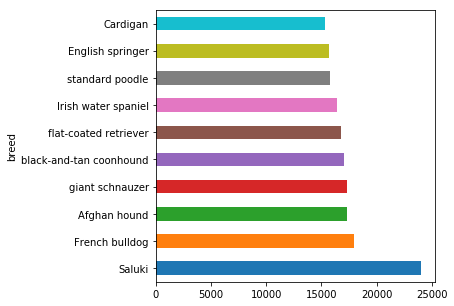

In [78]:
Twitter_archive_master.groupby(['breed']).favorite_count.mean().sort_values(ascending=False)[:10].plot(kind='barh',figsize=(5,5))

#### Top 10 dogs breed with retweet count

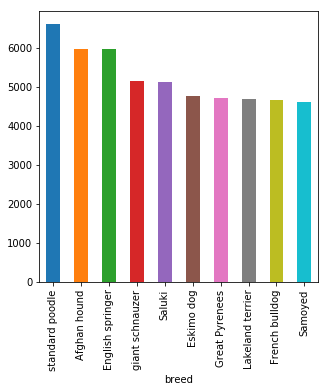

In [79]:
Twitter_archive_master.groupby(['breed']).retweet_count.mean().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(5,5))

#### Top 10 dogs breed with most avg rate

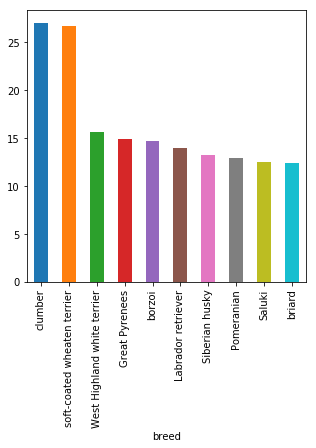

In [80]:
Twitter_archive_master.groupby(['breed']).rating.mean().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(5,5))

### dogs stages with:


   #### avg rate


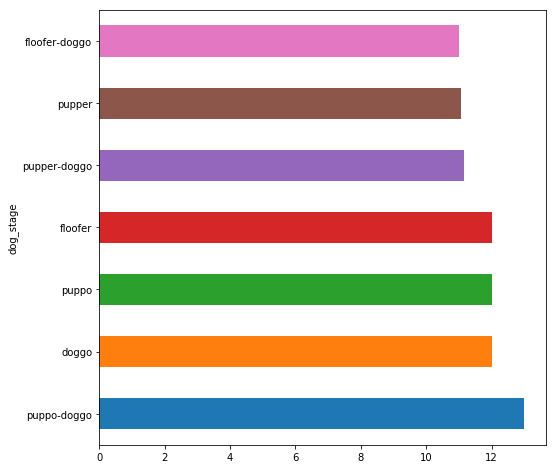

In [81]:
Twitter_archive_master.groupby(['dog_stage']).rating.mean().sort_values(ascending=False).plot(kind='barh',figsize=(8,8))

   #### avg retweets


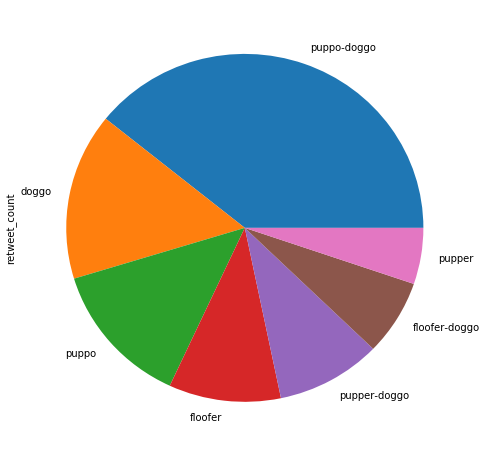

In [82]:
Twitter_archive_master.groupby(['dog_stage']).retweet_count.mean().sort_values(ascending=False).plot(kind='pie',figsize=(8,8))

   #### avg favourites


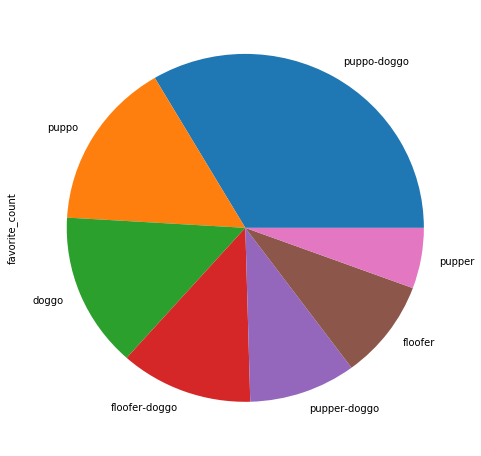

In [83]:
Twitter_archive_master.groupby(['dog_stage']).favorite_count.mean().sort_values(ascending=False).plot(kind='pie',figsize=(8,8))

#### Top 10 dog breeds with avg accuracy

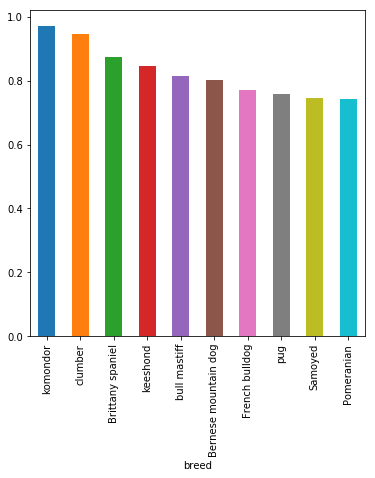

In [84]:
Twitter_archive_master.groupby(['breed']).accuracy.mean().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(6,6))

### timestamp and reach


In [85]:
#first we create column of str formated as Month_name-year
Twitter_archive_master['year'] = Twitter_archive_master.timestamp.dt.year.astype(str)

In [86]:
Twitter_archive_master['month']=Twitter_archive_master.timestamp.dt.month_name()

In [87]:
Twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 15 columns):
tweet_id          1463 non-null int64
timestamp         1463 non-null datetime64[ns]
source            1463 non-null object
text              1463 non-null object
rating            1463 non-null int64
name              1463 non-null object
dog_stage         227 non-null object
jpg_url           1463 non-null object
img_num           1463 non-null int64
breed             1463 non-null object
accuracy          1463 non-null float64
retweet_count     1463 non-null int64
favorite_count    1463 non-null int64
year              1463 non-null object
month             1463 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 182.9+ KB


In [88]:
Twitter_archive_master['Date'] = Twitter_archive_master.month+'-'+Twitter_archive_master.year

In [89]:
Twitter_archive_master.head(1)

,tweet_id,timestamp,source,text,rating,name,dog_stage,jpg_url,img_num,breed,accuracy,retweet_count,favorite_count,year,month,Date
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819,2017,August,August-2017


In [90]:
Twitter_archive_master.drop(columns=['year','month'],axis=1,inplace=True)

In [91]:
Twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 14 columns):
tweet_id          1463 non-null int64
timestamp         1463 non-null datetime64[ns]
source            1463 non-null object
text              1463 non-null object
rating            1463 non-null int64
name              1463 non-null object
dog_stage         227 non-null object
jpg_url           1463 non-null object
img_num           1463 non-null int64
breed             1463 non-null object
accuracy          1463 non-null float64
retweet_count     1463 non-null int64
favorite_count    1463 non-null int64
Date              1463 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 171.4+ KB


In [92]:
Twitter_archive_master.Date.unique()

array(['August-2017', 'July-2017', 'June-2017', 'May-2017', 'April-2017',
       'March-2017', 'February-2017', 'January-2017', 'December-2016',
       'November-2016', 'October-2016', 'September-2016', 'August-2016',
       'July-2016', 'June-2016', 'May-2016', 'April-2016', 'March-2016',
       'February-2016', 'January-2016', 'December-2015', 'November-2015'], dtype=object)

### Date and retweet count


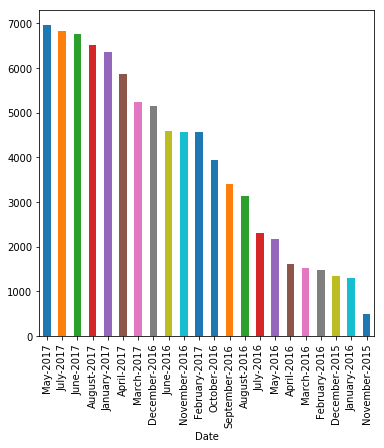

In [93]:
Twitter_archive_master.groupby(['Date']).retweet_count.mean().sort_values(ascending=False).plot(kind='bar',figsize=(6,6))

#### Date and favourites count

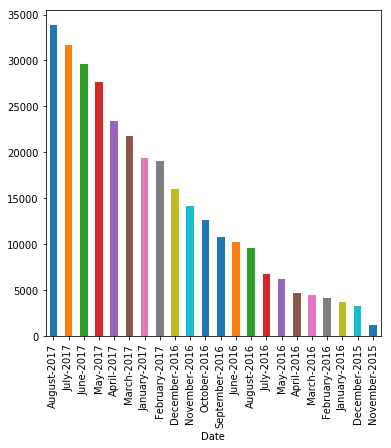

In [94]:
Twitter_archive_master.groupby(['Date']).favorite_count.mean().sort_values(ascending=False).plot(kind='bar',figsize=(6,6))

# Note
### Files wrangle_report.pdf and act_report.pdf are uploaded on directory of the current file on the workstation